In [ ]:
import pandas as pd
import numpy as np

path = '/content/land_price_2.csv'

data = pd.read_csv(path).to_numpy()
print(data.shape)

x = data[:, 0]
y = data[:, 1]
print('x', x.shape)
print('y', y.shape)

(30, 2)
x (30,)
y (30,)


In [ ]:
#h(x) = th0*x0+th1*x1+th2*x2
def h(x, theta):
  """
  x: np(m, 3)
  theta: np(3)
  return: z: np(m)
  """
  z = np.dot(x, theta.reshape(-1, 1))
  return z.flatten()

def cost_func(z, y):
  m = y.shape[0]
  J = np.sum((z-y)**2)/m
  return J

def grad(x, y, theta):
  m = y.shape[0]
  z = h(x, theta)
  g = np.dot(x.T, (z-y).reshape((-1, 1)))*2/m #np(3, 1)
  return g.flatten() #np(3)

In [ ]:
#feature scaling
def feature_scaling(x):
  mu = np.mean(x, axis=0) #np(n)
  x = (x-mu)/(np.max(x, axis=0)-np.min(x, axis=0))
  return x

x0 = np.ones((x.shape[0], 1))
x1 = x.reshape(-1, 1)
x2 = np.sqrt(x).reshape(-1, 1)
tmp = np.concatenate((x1, x2), axis=1)
x_scaled = feature_scaling(tmp)
x_scaled = np.concatenate((x0, x_scaled), axis=1)
print(x_scaled.shape)

(30, 3)


In [ ]:
#train model

theta = np.zeros(3)
alpha = 0.1

for i in range(20000):
  z = h(x_scaled, theta)
  J = cost_func(z, y)
  if i%100==0:
    print('i: %d, J: %f' % (i, J))

  g = grad(x_scaled, y, theta)
  theta += -alpha*g

i: 0, J: 1199843.372000
i: 100, J: 1107.686513
i: 200, J: 829.008869
i: 300, J: 791.841249
i: 400, J: 756.616761
i: 500, J: 723.019974
i: 600, J: 690.975462
i: 700, J: 660.411503
i: 800, J: 631.259692
i: 900, J: 603.454784
i: 1000, J: 576.934547
i: 1100, J: 551.639625
i: 1200, J: 527.513406
i: 1300, J: 504.501892
i: 1400, J: 482.553579
i: 1500, J: 461.619346
i: 1600, J: 441.652337
i: 1700, J: 422.607865
i: 1800, J: 404.443306
i: 1900, J: 387.118005
i: 2000, J: 370.593185
i: 2100, J: 354.831862
i: 2200, J: 339.798760
i: 2300, J: 325.460233
i: 2400, J: 311.784190
i: 2500, J: 298.740021
i: 2600, J: 286.298533
i: 2700, J: 274.431880
i: 2800, J: 263.113502
i: 2900, J: 252.318067
i: 3000, J: 242.021414
i: 3100, J: 232.200498
i: 3200, J: 222.833338
i: 3300, J: 213.898970
i: 3400, J: 205.377396
i: 3500, J: 197.249545
i: 3600, J: 189.497226
i: 3700, J: 182.103087
i: 3800, J: 175.050580
i: 3900, J: 168.323920
i: 4000, J: 161.908053
i: 4100, J: 155.788618
i: 4200, J: 149.951919
i: 4300, J: 144.38

In [ ]:
#evaluate model
z = h(x_scaled, theta)

for i, (zi, yi) in enumerate(zip(z, y)):
  print('i: %02d, predict: %f, real: %f' % (i+1, zi, yi))

i: 01, predict: 139.517252, real: 140.900000
i: 02, predict: 197.517528, real: 200.300000
i: 03, predict: 280.655356, real: 280.400000
i: 04, predict: 308.213945, real: 298.800000
i: 05, predict: 349.634661, real: 358.200000
i: 06, predict: 417.135428, real: 414.300000
i: 07, predict: 482.983808, real: 484.200000
i: 08, predict: 555.684018, real: 561.400000
i: 09, predict: 603.128786, real: 593.700000
i: 10, predict: 682.739582, real: 690.900000
i: 11, predict: 728.336539, real: 730.200000
i: 12, predict: 801.234589, real: 791.900000
i: 13, predict: 829.812595, real: 823.700000
i: 14, predict: 919.155359, real: 919.200000
i: 15, predict: 940.698098, real: 941.800000
i: 16, predict: 1011.925791, real: 1009.700000
i: 17, predict: 1050.245651, real: 1054.000000
i: 18, predict: 1113.193203, real: 1108.900000
i: 19, predict: 1210.054258, real: 1217.900000
i: 20, predict: 1265.858466, real: 1271.000000
i: 21, predict: 1304.291034, real: 1299.900000
i: 22, predict: 1370.999009, real: 1368.300

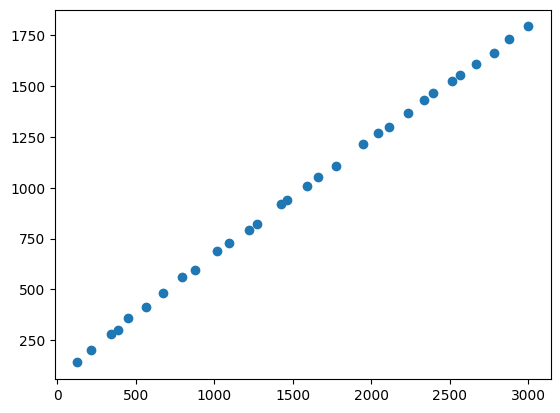

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.show()